In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
pd.options.mode.chained_assignment = None  # default='warn'
import gc
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
font_path = './NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf'
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname=font_path, size=18)
import seaborn as sns

In [2]:
%%time
# Read Data
basedir = './Training/training_data_ver_21/'
training_data_df = pd.read_csv(basedir + 'training_data_ver_21.csv')
print(training_data_df.shape)
training_data_df.head()

(1471947, 309)
Wall time: 17.3 s


,지번주소,도로명주소,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,부동산유형,전용면적_classes,가격_면적,가격_면적_classes,구,동,층_2nd,year_linear,year_sin,year_cos,distance_nearest_station,nearest_station_name,xnorm,ynorm,x_2nd,y_2nd,xy,년,지목명,토지면적_log,용도지역명1,토지이동상황,지형높이,지형형상,도로접면,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고도지구,고등학교,고속철도,공공공지,공공도서관,공공문화체육시설미분류,공공시설구역,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공용시설보호지구,공원,공원마을지구(공원집단시설지구),공원자연보존지구,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M_70M),광로3류(폭_40M_50M),광역계획구역,광장,교육환경보호구역,교통광장,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용용도지구기타,근린공원,근린광장,근린상업지역,기타공공공지시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타문화시설,기타보건위생시설,기타수도시설,기타시장시설,기타용도지역지구기타,기타용지,기타유통업무설비,기타자동차정류장,기타주차장시설,기타철도시설,기타폐기물처리시설,노외주차장,녹지,대공방어협조구역,대공방어협조구역(위탁고도_54_236m),대공방어협조구역(위탁고도_77_257m),대로1류(폭_35M_40M),대로2류(폭_30M_35M),대로3류(폭_25M_30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,리모델링지구,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화재보호구역기타,문화지구,미관지구,미관지구기타,방송통신시설,방수설비,방재지구,방화지구,변전소(전원개발사업구역),보전산지,보전임지,보행자전용도로,부설주차장,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업시설구역,상대보호구역,상대정화구역,상수원보호구역,상수원보호기타,생산녹지지역,소공원,소로1류(폭_10M_12M),소로2류(폭_8M_10M),소로3류(폭_8M_미만),소하천,소하천구역,수도공급시설,수평표면구역,시_도_생태_경관보전지역,시가지조성사업지역,시장,시장정비구역,시장정비구역기타,아파트지구,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,완충녹지,용도구역기타,용도구역미분류,운동장,원추표면구역,원형보존지,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차전용도로,자동차정류장,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(전술항공_5km),제한보호구역(후방지역_500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합운동장,종합의료시설,주거용지,주거환경개선지구,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M_25M),중로2류(폭_15M_20M),중로3류(폭_12M_15M),중심지미관지구,중요시설물보존지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,철도,철도보호지구,청사,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,통제보호구역,통제보호구역(민통선이남_300m),특수도로(보행자전용도로),특정개발진흥지구,특정용도제한지구,특화경관지구,폐기물처리시설,하수도,하수종말처리시설,하천,하천구역,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,홍수관리구역
0,서울특별시 강남구 개포동 1264-3,서울특별시 강남구 개포로31길 23-7,(1264-3),53.28,11500,-1,1992.0,14.0,2006-08-29,0,0,215.840841,0,0,0,1,0.657534,-0.835925,-0.548843,735.633243,0,5167.325126,-8970.432841,1.335062e+07,4.023433e+07,-4.635314e+07,2006,0,4.761319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,서울특별시 강남구 개포동 171-13,서울특별시 강남구 선릉로14길 11-0,(171-13),68.08,56500,2,1988.0,18.0,2006-12-20,0,1,829.905993,1,0,0,4,0.967123,-0.205104,0.978740,888.356067,1,6236.633208,-8586.489321,1.944780e+07,3.686390e+07,-5.355078e+07,2006,0,5.201256,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [3]:
training_data_df.isna().sum()

지번주소                        0
도로명주소                       0
건물(단지)명                     0
전용면적(㎡)                     0
거래금액(만원)                    0
층                           0
건축년도                        0
계약날짜기준_건물연식                 0
계약날짜                        0
부동산유형                       0
전용면적_classes                0
가격_면적                       0
가격_면적_classes               0
구                           0
동                           0
층_2nd                       0
year_linear                 0
year_sin                    0
year_cos                    0
distance_nearest_station    0
nearest_station_name        0
xnorm                       0
ynorm                       0
x_2nd                       0
y_2nd                       0
xy                          0
년                           0
지목명                         0
토지면적_log                    0
용도지역명1                      0
토지이동상황                      0
지형높이                        0
지형형상                        0
도로접면      

<AxesSubplot:>

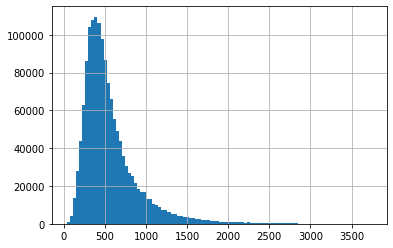

In [4]:
training_data_df['가격_면적'].hist(bins=100)

In [5]:
def price_over_area_feature_engi(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        for i in range(201):
            if x < ((i+1)*15):
                return '{}~{}'.format((i*15), (i+1)*15)
        
        return '3000초과'

In [6]:
training_data_df['가격_면적_classes'] = training_data_df['가격_면적'].apply(price_over_area_feature_engi)

In [7]:
col_map = {}
col_map_df = pd.DataFrame({'cat':training_data_df['가격_면적_classes'].unique(),
                           'map':[i for i in range(len(training_data_df['가격_면적_classes'].unique()))]})
for i in range(col_map_df.shape[0]):
    col_map[col_map_df['cat'][i]] = col_map_df['map'][i]
training_data_df['가격_면적_classes'] = training_data_df['가격_면적_classes'].map(col_map)
col_map_df.to_csv('./Training/training_data_ver_21/feature_maps/가격_면적_classes_map.csv')

In [8]:
training_data_df['가격_면적_classes'].nunique()

200

In [9]:
training_data_df['가격_면적_classes'].value_counts()

13     45298
39     45142
28     44393
22     44120
14     43421
44     43336
31     42415
18     41890
36     41801
17     41241
35     39116
37     39061
29     37544
30     36807
33     36245
42     34337
2      33033
19     31654
16     30394
3      29487
21     27232
15     26697
23     25726
32     24756
20     23980
41     22318
34     22180
24     20549
0      19970
25     19846
47     18027
40     17557
8      17258
50     17114
55     16841
27     14377
52     13394
46     13319
45     13083
5      11985
26     11777
48     11387
7      10970
6      10820
1      10151
4       9393
43      9389
60      9294
57      8770
61      7569
54      7435
53      7390
72      7286
58      7202
38      6830
9       6530
56      6315
70      6294
10      6291
71      5329
69      5304
59      5059
51      4596
12      4596
92      4443
66      4274
11      4114
90      3874
75      3753
74      3730
67      3560
76      3210
77      3078
79      2955
101     2854
68      2832
73      2703

In [10]:
cols_to_drop = ['지번주소', '도로명주소', '건물(단지)명', '전용면적(㎡)', '거래금액(만원)', '계약날짜', '가격_면적', '년', '가격_면적_classes']

# Training

In [11]:
from sklearn.model_selection import KFold, GroupKFold, GroupShuffleSplit

In [12]:
import lightgbm as lgb

In [13]:
from sklearn.metrics import r2_score

In [14]:
import pickle

In [15]:
gkf = GroupKFold(n_splits=5)

In [16]:
from sklearn.metrics import mean_squared_error, log_loss

In [17]:
target_cols = ['가격_면적_classes']

In [18]:
cat_cols_df = pd.read_csv(basedir + 'cat_cols.csv')
cat_cols_df

,colname
0,부동산유형
1,전용면적_classes
2,가격_면적_classes
3,구
4,동
5,nearest_station_name
6,지목명
7,용도지역명1
8,토지이동상황
9,지형높이


In [19]:
cat_cols = cat_cols_df['colname'].tolist()
cat_cols

['부동산유형',
 '전용면적_classes',
 '가격_면적_classes',
 '구',
 '동',
 'nearest_station_name',
 '지목명',
 '용도지역명1',
 '토지이동상황',
 '지형높이',
 '지형형상',
 '도로접면',
 '(한강)오염행위_제한지역',
 '(한강)폐기물매립시설_설치제한지역',
 '4대문안',
 '가로구역별_최고높이_제한지역',
 '가스공급설비',
 '가축사육제한구역',
 '개발제한구역',
 '개발진흥지구',
 '개발행위허가제한지역',
 '건축선',
 '건축용도지역기타',
 '건축용도지역미분류',
 '건축허가_착공제한지역',
 '경관광장',
 '경관녹지',
 '경관지구',
 '경관지구기타',
 '고도지구',
 '고등학교',
 '고속철도',
 '공공공지',
 '공공도서관',
 '공공문화체육시설미분류',
 '공공시설구역',
 '공공주택지구',
 '공공지원민간임대주택_공급촉진지구',
 '공공청사',
 '공용시설보호지구',
 '공원',
 '공원마을지구(공원집단시설지구)',
 '공원자연보존지구',
 '공원자연환경지구',
 '공익용산지',
 '공익임지',
 '공장설립승인지역',
 '공장설립제한지역',
 '공항소음피해예상지역',
 '공항시설보호지구',
 '과밀억제권역',
 '광로1류(폭_70M_이상)',
 '광로2류(폭_50M_70M)',
 '광로3류(폭_40M_50M)',
 '광역계획구역',
 '광장',
 '교육환경보호구역',
 '교통광장',
 '국가산업단지',
 '국가지정문화재구역',
 '국가하천',
 '국립공원',
 '국민임대주택단지예정지구',
 '국지도로',
 '국토이용용도지구기타',
 '근린공원',
 '근린광장',
 '근린상업지역',
 '기타공공공지시설',
 '기타공원시설',
 '기타교통시설',
 '기타녹지시설',
 '기타도로시설',
 '기타도시공간시설',
 '기타문화시설',
 '기타보건위생시설',
 '기타수도시설',
 '기타시장시설',
 '기타용도지역지구기타',
 '기타용지',
 '기타유통업무설비',
 '기타자동차정류장

In [20]:
cat_cols.remove('가격_면적_classes')

Fold 0 start
creating fold data...
(1177557, 300)
y dist plot


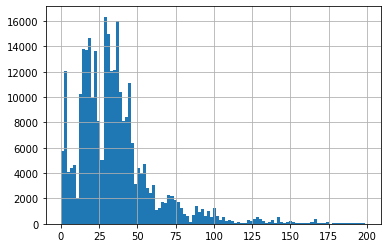

creating model...
start training...


c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 100 rounds
[25]	training's multi_logloss: 4.08133	valid_1's multi_logloss: 4.20107
[50]	training's multi_logloss: 3.97443	valid_1's multi_logloss: 4.13085
[75]	training's multi_logloss: 3.88886	valid_1's multi_logloss: 4.07347
[100]	training's multi_logloss: 3.81703	valid_1's multi_logloss: 4.02502
[125]	training's multi_logloss: 3.75518	valid_1's multi_logloss: 3.9835
[150]	training's multi_logloss: 3.70063	valid_1's multi_logloss: 3.94687
[175]	training's multi_logloss: 3.65162	valid_1's multi_logloss: 3.9143
[200]	training's multi_logloss: 3.60734	valid_1's multi_logloss: 3.88511
[225]	training's multi_logloss: 3.56761	valid_1's multi_logloss: 3.85914
[250]	training's multi_logloss: 3.53101	valid_1's multi_logloss: 3.83541
[275]	training's multi_logloss: 3.49753	valid_1's multi_logloss: 3.81397
[300]	training's multi_logloss: 3.46659	valid_1's multi_logloss: 3.79427
[325]	training's multi_logloss: 3.43812	valid_1's multi_logloss: 3.

[2800]	training's multi_logloss: 2.68381	valid_1's multi_logloss: 3.48811
[2825]	training's multi_logloss: 2.68056	valid_1's multi_logloss: 3.48787
[2850]	training's multi_logloss: 2.67734	valid_1's multi_logloss: 3.48761
[2875]	training's multi_logloss: 2.67414	valid_1's multi_logloss: 3.48737
[2900]	training's multi_logloss: 2.67096	valid_1's multi_logloss: 3.48717
[2925]	training's multi_logloss: 2.6678	valid_1's multi_logloss: 3.48696
[2950]	training's multi_logloss: 2.66466	valid_1's multi_logloss: 3.48674
[2975]	training's multi_logloss: 2.66154	valid_1's multi_logloss: 3.48656
[3000]	training's multi_logloss: 2.65846	valid_1's multi_logloss: 3.48635
[3025]	training's multi_logloss: 2.65538	valid_1's multi_logloss: 3.48615
[3050]	training's multi_logloss: 2.65233	valid_1's multi_logloss: 3.48596
[3075]	training's multi_logloss: 2.64928	valid_1's multi_logloss: 3.48578
[3100]	training's multi_logloss: 2.64627	valid_1's multi_logloss: 3.48561
[3125]	training's multi_logloss: 2.6432

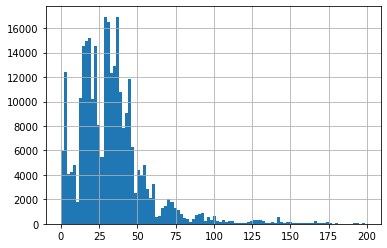

creating model...
start training...
Training until validation scores don't improve for 100 rounds
[25]	training's multi_logloss: 4.10584	valid_1's multi_logloss: 4.10437
[50]	training's multi_logloss: 3.99685	valid_1's multi_logloss: 4.03604
[75]	training's multi_logloss: 3.91021	valid_1's multi_logloss: 3.97971
[100]	training's multi_logloss: 3.83748	valid_1's multi_logloss: 3.93176
[125]	training's multi_logloss: 3.77491	valid_1's multi_logloss: 3.89023
[150]	training's multi_logloss: 3.71959	valid_1's multi_logloss: 3.85331
[175]	training's multi_logloss: 3.67006	valid_1's multi_logloss: 3.82015
[200]	training's multi_logloss: 3.62582	valid_1's multi_logloss: 3.79071
[225]	training's multi_logloss: 3.58565	valid_1's multi_logloss: 3.76417
[250]	training's multi_logloss: 3.54884	valid_1's multi_logloss: 3.73991
[275]	training's multi_logloss: 3.515	valid_1's multi_logloss: 3.71778
[300]	training's multi_logloss: 3.48392	valid_1's multi_logloss: 3.69769
[325]	training's multi_logloss:

[2800]	training's multi_logloss: 2.69201	valid_1's multi_logloss: 3.36609
[2825]	training's multi_logloss: 2.68872	valid_1's multi_logloss: 3.36568
[2850]	training's multi_logloss: 2.68545	valid_1's multi_logloss: 3.3653
[2875]	training's multi_logloss: 2.68221	valid_1's multi_logloss: 3.36491
[2900]	training's multi_logloss: 2.679	valid_1's multi_logloss: 3.3645
[2925]	training's multi_logloss: 2.6758	valid_1's multi_logloss: 3.3641
[2950]	training's multi_logloss: 2.67264	valid_1's multi_logloss: 3.36373
[2975]	training's multi_logloss: 2.66951	valid_1's multi_logloss: 3.36339
[3000]	training's multi_logloss: 2.66639	valid_1's multi_logloss: 3.36305
[3025]	training's multi_logloss: 2.6633	valid_1's multi_logloss: 3.3627
[3050]	training's multi_logloss: 2.66022	valid_1's multi_logloss: 3.36235
[3075]	training's multi_logloss: 2.65717	valid_1's multi_logloss: 3.36201
[3100]	training's multi_logloss: 2.65414	valid_1's multi_logloss: 3.36169
[3125]	training's multi_logloss: 2.65114	valid

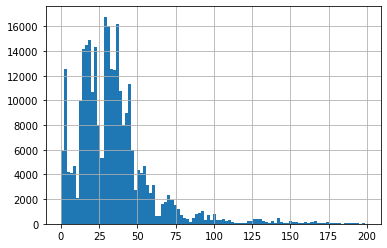

creating model...
start training...
Training until validation scores don't improve for 100 rounds
[25]	training's multi_logloss: 4.09722	valid_1's multi_logloss: 4.13144
[50]	training's multi_logloss: 3.99	valid_1's multi_logloss: 4.05855
[75]	training's multi_logloss: 3.90438	valid_1's multi_logloss: 3.99872
[100]	training's multi_logloss: 3.83264	valid_1's multi_logloss: 3.9485
[125]	training's multi_logloss: 3.77015	valid_1's multi_logloss: 3.90464
[150]	training's multi_logloss: 3.71483	valid_1's multi_logloss: 3.86586
[175]	training's multi_logloss: 3.66576	valid_1's multi_logloss: 3.8314
[200]	training's multi_logloss: 3.6213	valid_1's multi_logloss: 3.80044
[225]	training's multi_logloss: 3.58123	valid_1's multi_logloss: 3.77265
[250]	training's multi_logloss: 3.54454	valid_1's multi_logloss: 3.74715
[275]	training's multi_logloss: 3.51083	valid_1's multi_logloss: 3.72385
[300]	training's multi_logloss: 3.47968	valid_1's multi_logloss: 3.70258
[325]	training's multi_logloss: 3.4

[2800]	training's multi_logloss: 2.69141	valid_1's multi_logloss: 3.34421
[2825]	training's multi_logloss: 2.68811	valid_1's multi_logloss: 3.34373
[2850]	training's multi_logloss: 2.68485	valid_1's multi_logloss: 3.34324
[2875]	training's multi_logloss: 2.6816	valid_1's multi_logloss: 3.34275
[2900]	training's multi_logloss: 2.67838	valid_1's multi_logloss: 3.34225
[2925]	training's multi_logloss: 2.6752	valid_1's multi_logloss: 3.34178
[2950]	training's multi_logloss: 2.67202	valid_1's multi_logloss: 3.34133
[2975]	training's multi_logloss: 2.6689	valid_1's multi_logloss: 3.34086
[3000]	training's multi_logloss: 2.66576	valid_1's multi_logloss: 3.34043
[3025]	training's multi_logloss: 2.66266	valid_1's multi_logloss: 3.34
[3050]	training's multi_logloss: 2.6596	valid_1's multi_logloss: 3.3396
[3075]	training's multi_logloss: 2.65657	valid_1's multi_logloss: 3.3392
[3100]	training's multi_logloss: 2.65354	valid_1's multi_logloss: 3.33881
[3125]	training's multi_logloss: 2.65055	valid_

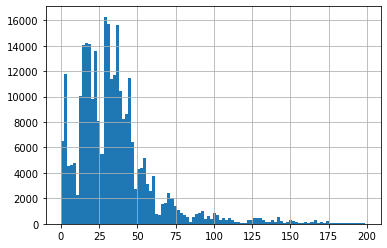

creating model...
start training...
Training until validation scores don't improve for 100 rounds
[25]	training's multi_logloss: 4.08416	valid_1's multi_logloss: 4.18615
[50]	training's multi_logloss: 3.97794	valid_1's multi_logloss: 4.11042
[75]	training's multi_logloss: 3.89341	valid_1's multi_logloss: 4.04915
[100]	training's multi_logloss: 3.82183	valid_1's multi_logloss: 3.99675
[125]	training's multi_logloss: 3.75995	valid_1's multi_logloss: 3.95142
[150]	training's multi_logloss: 3.70511	valid_1's multi_logloss: 3.91147
[175]	training's multi_logloss: 3.65655	valid_1's multi_logloss: 3.87635
[200]	training's multi_logloss: 3.61286	valid_1's multi_logloss: 3.84495
[225]	training's multi_logloss: 3.57337	valid_1's multi_logloss: 3.81676
[250]	training's multi_logloss: 3.53715	valid_1's multi_logloss: 3.79129
[275]	training's multi_logloss: 3.50375	valid_1's multi_logloss: 3.768
[300]	training's multi_logloss: 3.4729	valid_1's multi_logloss: 3.74669
[325]	training's multi_logloss: 

[2800]	training's multi_logloss: 2.69055	valid_1's multi_logloss: 3.3981
[2825]	training's multi_logloss: 2.68728	valid_1's multi_logloss: 3.39771
[2850]	training's multi_logloss: 2.68404	valid_1's multi_logloss: 3.39737
[2875]	training's multi_logloss: 2.68083	valid_1's multi_logloss: 3.39703
[2900]	training's multi_logloss: 2.67764	valid_1's multi_logloss: 3.39672
[2925]	training's multi_logloss: 2.67448	valid_1's multi_logloss: 3.39638
[2950]	training's multi_logloss: 2.67134	valid_1's multi_logloss: 3.39604
[2975]	training's multi_logloss: 2.66823	valid_1's multi_logloss: 3.39571
[3000]	training's multi_logloss: 2.66511	valid_1's multi_logloss: 3.3954
[3025]	training's multi_logloss: 2.66203	valid_1's multi_logloss: 3.39511
[3050]	training's multi_logloss: 2.65897	valid_1's multi_logloss: 3.3948
[3075]	training's multi_logloss: 2.65594	valid_1's multi_logloss: 3.39454
[3100]	training's multi_logloss: 2.65293	valid_1's multi_logloss: 3.39424
[3125]	training's multi_logloss: 2.64993	

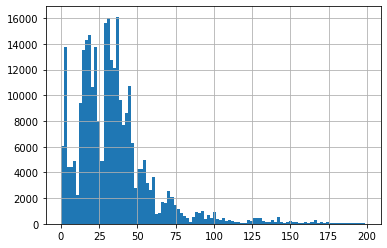

creating model...
start training...
Training until validation scores don't improve for 100 rounds
[25]	training's multi_logloss: 4.08603	valid_1's multi_logloss: 4.18043
[50]	training's multi_logloss: 3.97853	valid_1's multi_logloss: 4.10849
[75]	training's multi_logloss: 3.89239	valid_1's multi_logloss: 4.04956
[100]	training's multi_logloss: 3.82034	valid_1's multi_logloss: 4.00013
[125]	training's multi_logloss: 3.75792	valid_1's multi_logloss: 3.95721
[150]	training's multi_logloss: 3.70331	valid_1's multi_logloss: 3.92004
[175]	training's multi_logloss: 3.65475	valid_1's multi_logloss: 3.88716
[200]	training's multi_logloss: 3.61103	valid_1's multi_logloss: 3.85778
[225]	training's multi_logloss: 3.57132	valid_1's multi_logloss: 3.8313
[250]	training's multi_logloss: 3.5351	valid_1's multi_logloss: 3.80745
[275]	training's multi_logloss: 3.50179	valid_1's multi_logloss: 3.78571
[300]	training's multi_logloss: 3.47114	valid_1's multi_logloss: 3.76598
[325]	training's multi_logloss:

[2800]	training's multi_logloss: 2.68457	valid_1's multi_logloss: 3.44782
[2825]	training's multi_logloss: 2.68129	valid_1's multi_logloss: 3.44747
[2850]	training's multi_logloss: 2.67806	valid_1's multi_logloss: 3.4471
[2875]	training's multi_logloss: 2.67482	valid_1's multi_logloss: 3.44678
[2900]	training's multi_logloss: 2.67162	valid_1's multi_logloss: 3.44645
[2925]	training's multi_logloss: 2.66844	valid_1's multi_logloss: 3.44615
[2950]	training's multi_logloss: 2.66528	valid_1's multi_logloss: 3.44582
[2975]	training's multi_logloss: 2.66215	valid_1's multi_logloss: 3.44553
[3000]	training's multi_logloss: 2.65903	valid_1's multi_logloss: 3.44526
[3025]	training's multi_logloss: 2.65593	valid_1's multi_logloss: 3.445
[3050]	training's multi_logloss: 2.65284	valid_1's multi_logloss: 3.44472
[3075]	training's multi_logloss: 2.64978	valid_1's multi_logloss: 3.44446
[3100]	training's multi_logloss: 2.64677	valid_1's multi_logloss: 3.44423
[3125]	training's multi_logloss: 2.64375	

<Figure size 432x288 with 0 Axes>

In [21]:
count = 0
oof = np.zeros((training_data_df.shape[0],200))

for train_idx, val_idx in gkf.split(training_data_df, groups=training_data_df['지번주소']):
    print('Fold {} start'.format(count))
    
    print('creating fold data...')
    train_data = training_data_df.loc[train_idx].sample(frac=1).reset_index(drop=True)
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=cols_to_drop)
    y_train = train_data['가격_면적_classes']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=cols_to_drop)
    y_val = val_data['가격_면적_classes']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    print('creating model...')
    params = {
        'objective': 'multiclass',
        'num_class':200,
        #'alpha': 1.35,
        'learning_rate': 0.003,
        'seed': 42,
        'max_depth': 6,
        'num_leaves': 29,
        'min_data_in_leaf': 128,
        #'bagging_fraction':0.7,
        'feature_fraction':0.7,
        #'lambda_l2': 0,
        'metric': 'multi_logloss',
        'num_threads': 6,
        'verbosity': -1
        #'is_unbalance': True
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    num_rounds = 50000
     
    print('start training...')
    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[train_dataset, val_dataset],
                    early_stopping_rounds=100, verbose_eval=25, keep_training_booster=True
                   )    
    
    '''model = lgb.LGBMClassifier(
        objective='multiclass', learning_rate=0.003, n_estimators=50000, colsample_bytree=0.7, n_jobs=6,
        min_child_samples=256
    )'''
    '''model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_val, y_val)], early_stopping_rounds=100, verbose=25,
              categorical_feature=cat_cols)'''
    
    print('saving model...')
    bst.save_model(basedir + 'lightgbm_multiclass_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    #pickle.dump(model, open(basedir + 'lightgbm_multiclass_{}.joblib'.format(count), 'wb'))
    
    #preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    '''print('making preliminary predictions...')
    preds_proba = model.predict_proba(x_val)'''
    
    '''print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()'''
    
    '''print('preds dist plot')
    sns.displot(np.argmax(preds_proba, axis=1))
    plt.show()
    plt.clf()'''
    
    #oof[val_idx] = preds    
    #oof[val_idx,:] = preds_proba
    
    #print(np.sqrt(mean_squared_error(y_val, preds)))
    #print(log_loss(y_val, preds_proba, labels=[i for i in range(200)]))
    
    print('Fold {} end'.format(count))
    count += 1
    

In [ ]:
#log_loss(training_data_df['가격_면적_classes'], oof, labels=[i for i in range(200)])

Fold 0 start
creating fold data...
(1177557, 300)
y dist plot


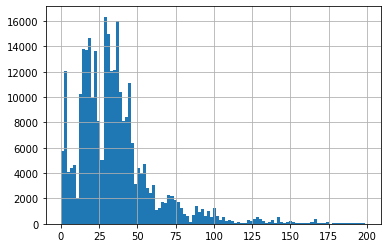

creating model...
start training...


c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 100 rounds
[25]	training's multi_logloss: 4.17922	valid_1's multi_logloss: 4.26234
[50]	training's multi_logloss: 4.12716	valid_1's multi_logloss: 4.23022
[75]	training's multi_logloss: 4.08308	valid_1's multi_logloss: 4.20198
[100]	training's multi_logloss: 4.04369	valid_1's multi_logloss: 4.17619
[125]	training's multi_logloss: 4.00834	valid_1's multi_logloss: 4.15297
[150]	training's multi_logloss: 3.97574	valid_1's multi_logloss: 4.13136
[175]	training's multi_logloss: 3.94533	valid_1's multi_logloss: 4.11109
[200]	training's multi_logloss: 3.91692	valid_1's multi_logloss: 4.09206
[225]	training's multi_logloss: 3.89023	valid_1's multi_logloss: 4.07406
[250]	training's multi_logloss: 3.86493	valid_1's multi_logloss: 4.05702
[275]	training's multi_logloss: 3.84101	valid_1's multi_logloss: 4.04091
[300]	training's multi_logloss: 3.81827	valid_1's multi_logloss: 4.02562
[325]	training's multi_logloss: 3.79657	valid_1's multi_logloss: 

[2800]	training's multi_logloss: 3.06711	valid_1's multi_logloss: 3.5769
[2825]	training's multi_logloss: 3.0641	valid_1's multi_logloss: 3.57568
[2850]	training's multi_logloss: 3.06112	valid_1's multi_logloss: 3.57449
[2875]	training's multi_logloss: 3.05818	valid_1's multi_logloss: 3.57333
[2900]	training's multi_logloss: 3.05525	valid_1's multi_logloss: 3.57217
[2925]	training's multi_logloss: 3.05234	valid_1's multi_logloss: 3.57101
[2950]	training's multi_logloss: 3.04946	valid_1's multi_logloss: 3.56989
[2975]	training's multi_logloss: 3.04662	valid_1's multi_logloss: 3.5688
[3000]	training's multi_logloss: 3.04382	valid_1's multi_logloss: 3.56775
[3025]	training's multi_logloss: 3.04102	valid_1's multi_logloss: 3.56668
[3050]	training's multi_logloss: 3.03825	valid_1's multi_logloss: 3.56564
[3075]	training's multi_logloss: 3.0355	valid_1's multi_logloss: 3.56463
[3100]	training's multi_logloss: 3.03277	valid_1's multi_logloss: 3.56363
[3125]	training's multi_logloss: 3.0301	va

[5600]	training's multi_logloss: 2.82949	valid_1's multi_logloss: 3.50868
[5625]	training's multi_logloss: 2.82793	valid_1's multi_logloss: 3.50839
[5650]	training's multi_logloss: 2.82636	valid_1's multi_logloss: 3.50808
[5675]	training's multi_logloss: 2.8248	valid_1's multi_logloss: 3.50776
[5700]	training's multi_logloss: 2.82326	valid_1's multi_logloss: 3.50746
[5725]	training's multi_logloss: 2.82171	valid_1's multi_logloss: 3.50716
[5750]	training's multi_logloss: 2.82019	valid_1's multi_logloss: 3.50687
[5775]	training's multi_logloss: 2.81866	valid_1's multi_logloss: 3.50658
[5800]	training's multi_logloss: 2.81713	valid_1's multi_logloss: 3.50629
[5825]	training's multi_logloss: 2.8156	valid_1's multi_logloss: 3.50601
[5850]	training's multi_logloss: 2.81409	valid_1's multi_logloss: 3.50573
[5875]	training's multi_logloss: 2.81258	valid_1's multi_logloss: 3.50544
[5900]	training's multi_logloss: 2.81108	valid_1's multi_logloss: 3.50515
[5925]	training's multi_logloss: 2.80959

[8400]	training's multi_logloss: 2.6843	valid_1's multi_logloss: 3.48828
[8425]	training's multi_logloss: 2.68321	valid_1's multi_logloss: 3.48817
[8450]	training's multi_logloss: 2.68213	valid_1's multi_logloss: 3.48809
[8475]	training's multi_logloss: 2.68105	valid_1's multi_logloss: 3.48799
[8500]	training's multi_logloss: 2.67997	valid_1's multi_logloss: 3.4879
[8525]	training's multi_logloss: 2.6789	valid_1's multi_logloss: 3.48781
[8550]	training's multi_logloss: 2.67783	valid_1's multi_logloss: 3.48772
[8575]	training's multi_logloss: 2.67676	valid_1's multi_logloss: 3.48765
[8600]	training's multi_logloss: 2.67569	valid_1's multi_logloss: 3.48756
[8625]	training's multi_logloss: 2.67461	valid_1's multi_logloss: 3.48748
[8650]	training's multi_logloss: 2.67354	valid_1's multi_logloss: 3.48739
[8675]	training's multi_logloss: 2.67248	valid_1's multi_logloss: 3.48731
[8700]	training's multi_logloss: 2.67143	valid_1's multi_logloss: 3.48723
[8725]	training's multi_logloss: 2.67037	

[11175]	training's multi_logloss: 2.57785	valid_1's multi_logloss: 3.48387
[11200]	training's multi_logloss: 2.577	valid_1's multi_logloss: 3.48387
[11225]	training's multi_logloss: 2.57616	valid_1's multi_logloss: 3.48386
[11250]	training's multi_logloss: 2.57532	valid_1's multi_logloss: 3.48386
[11275]	training's multi_logloss: 2.57449	valid_1's multi_logloss: 3.48384
[11300]	training's multi_logloss: 2.57364	valid_1's multi_logloss: 3.48384
[11325]	training's multi_logloss: 2.57279	valid_1's multi_logloss: 3.48384
[11350]	training's multi_logloss: 2.57196	valid_1's multi_logloss: 3.48384
[11375]	training's multi_logloss: 2.57112	valid_1's multi_logloss: 3.48382
[11400]	training's multi_logloss: 2.57028	valid_1's multi_logloss: 3.48383
[11425]	training's multi_logloss: 2.56945	valid_1's multi_logloss: 3.48382
[11450]	training's multi_logloss: 2.56863	valid_1's multi_logloss: 3.48381
[11475]	training's multi_logloss: 2.5678	valid_1's multi_logloss: 3.48381
[11500]	training's multi_log

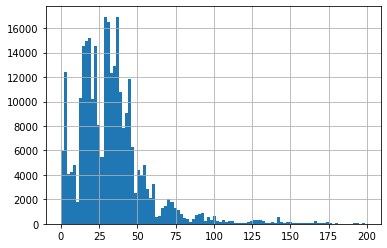

creating model...
start training...
Training until validation scores don't improve for 100 rounds
[25]	training's multi_logloss: 4.20378	valid_1's multi_logloss: 4.16155
[50]	training's multi_logloss: 4.15101	valid_1's multi_logloss: 4.13152
[75]	training's multi_logloss: 4.10646	valid_1's multi_logloss: 4.10496
[100]	training's multi_logloss: 4.06661	valid_1's multi_logloss: 4.08037
[125]	training's multi_logloss: 4.03049	valid_1's multi_logloss: 4.05772
[150]	training's multi_logloss: 3.99726	valid_1's multi_logloss: 4.03654
[175]	training's multi_logloss: 3.96661	valid_1's multi_logloss: 4.0168
[200]	training's multi_logloss: 3.93793	valid_1's multi_logloss: 3.99824
[225]	training's multi_logloss: 3.91081	valid_1's multi_logloss: 3.98048
[250]	training's multi_logloss: 3.88531	valid_1's multi_logloss: 3.96376
[275]	training's multi_logloss: 3.86121	valid_1's multi_logloss: 3.94792
[300]	training's multi_logloss: 3.83829	valid_1's multi_logloss: 3.93277
[325]	training's multi_logloss

[2800]	training's multi_logloss: 3.07938	valid_1's multi_logloss: 3.46897
[2825]	training's multi_logloss: 3.07638	valid_1's multi_logloss: 3.46767
[2850]	training's multi_logloss: 3.07338	valid_1's multi_logloss: 3.46641
[2875]	training's multi_logloss: 3.07039	valid_1's multi_logloss: 3.46515
[2900]	training's multi_logloss: 3.06745	valid_1's multi_logloss: 3.46391
[2925]	training's multi_logloss: 3.06456	valid_1's multi_logloss: 3.46272
[2950]	training's multi_logloss: 3.06167	valid_1's multi_logloss: 3.46153
[2975]	training's multi_logloss: 3.05879	valid_1's multi_logloss: 3.46033
[3000]	training's multi_logloss: 3.05595	valid_1's multi_logloss: 3.45917
[3025]	training's multi_logloss: 3.05314	valid_1's multi_logloss: 3.45804
[3050]	training's multi_logloss: 3.05033	valid_1's multi_logloss: 3.4569
[3075]	training's multi_logloss: 3.04757	valid_1's multi_logloss: 3.45581
[3100]	training's multi_logloss: 3.04482	valid_1's multi_logloss: 3.45471
[3125]	training's multi_logloss: 3.0421

[5600]	training's multi_logloss: 2.83904	valid_1's multi_logloss: 3.39261
[5625]	training's multi_logloss: 2.83745	valid_1's multi_logloss: 3.39226
[5650]	training's multi_logloss: 2.83587	valid_1's multi_logloss: 3.39191
[5675]	training's multi_logloss: 2.8343	valid_1's multi_logloss: 3.39158
[5700]	training's multi_logloss: 2.83273	valid_1's multi_logloss: 3.39124
[5725]	training's multi_logloss: 2.83118	valid_1's multi_logloss: 3.39091
[5750]	training's multi_logloss: 2.82962	valid_1's multi_logloss: 3.39057
[5775]	training's multi_logloss: 2.82805	valid_1's multi_logloss: 3.39023
[5800]	training's multi_logloss: 2.82651	valid_1's multi_logloss: 3.3899
[5825]	training's multi_logloss: 2.82497	valid_1's multi_logloss: 3.38957
[5850]	training's multi_logloss: 2.82344	valid_1's multi_logloss: 3.38924
[5875]	training's multi_logloss: 2.82192	valid_1's multi_logloss: 3.3889
[5900]	training's multi_logloss: 2.8204	valid_1's multi_logloss: 3.38858
[5925]	training's multi_logloss: 2.81888	v

[8400]	training's multi_logloss: 2.69195	valid_1's multi_logloss: 3.36653
[8425]	training's multi_logloss: 2.69085	valid_1's multi_logloss: 3.3664
[8450]	training's multi_logloss: 2.68975	valid_1's multi_logloss: 3.36626
[8475]	training's multi_logloss: 2.68866	valid_1's multi_logloss: 3.36611
[8500]	training's multi_logloss: 2.68757	valid_1's multi_logloss: 3.36598
[8525]	training's multi_logloss: 2.68648	valid_1's multi_logloss: 3.36584
[8550]	training's multi_logloss: 2.68539	valid_1's multi_logloss: 3.36571
[8575]	training's multi_logloss: 2.6843	valid_1's multi_logloss: 3.36557
[8600]	training's multi_logloss: 2.68322	valid_1's multi_logloss: 3.36544
[8625]	training's multi_logloss: 2.68214	valid_1's multi_logloss: 3.3653
[8650]	training's multi_logloss: 2.68107	valid_1's multi_logloss: 3.36518
[8675]	training's multi_logloss: 2.67998	valid_1's multi_logloss: 3.36505
[8700]	training's multi_logloss: 2.67892	valid_1's multi_logloss: 3.36491
[8725]	training's multi_logloss: 2.67784	

[11175]	training's multi_logloss: 2.5844	valid_1's multi_logloss: 3.35626
[11200]	training's multi_logloss: 2.58355	valid_1's multi_logloss: 3.35621
[11225]	training's multi_logloss: 2.5827	valid_1's multi_logloss: 3.35615
[11250]	training's multi_logloss: 2.58184	valid_1's multi_logloss: 3.35611
[11275]	training's multi_logloss: 2.58099	valid_1's multi_logloss: 3.35605
[11300]	training's multi_logloss: 2.58013	valid_1's multi_logloss: 3.356
[11325]	training's multi_logloss: 2.57928	valid_1's multi_logloss: 3.35595
[11350]	training's multi_logloss: 2.57844	valid_1's multi_logloss: 3.3559
[11375]	training's multi_logloss: 2.57758	valid_1's multi_logloss: 3.35585
[11400]	training's multi_logloss: 2.57674	valid_1's multi_logloss: 3.3558
[11425]	training's multi_logloss: 2.57589	valid_1's multi_logloss: 3.35576
[11450]	training's multi_logloss: 2.57505	valid_1's multi_logloss: 3.35571
[11475]	training's multi_logloss: 2.57421	valid_1's multi_logloss: 3.35567
[11500]	training's multi_loglos

[13925]	training's multi_logloss: 2.49894	valid_1's multi_logloss: 3.35306
[13950]	training's multi_logloss: 2.49824	valid_1's multi_logloss: 3.35305
[13975]	training's multi_logloss: 2.49754	valid_1's multi_logloss: 3.35305
[14000]	training's multi_logloss: 2.49683	valid_1's multi_logloss: 3.35304
[14025]	training's multi_logloss: 2.49613	valid_1's multi_logloss: 3.35303
[14050]	training's multi_logloss: 2.49542	valid_1's multi_logloss: 3.35302
[14075]	training's multi_logloss: 2.49471	valid_1's multi_logloss: 3.35301
[14100]	training's multi_logloss: 2.494	valid_1's multi_logloss: 3.353
[14125]	training's multi_logloss: 2.4933	valid_1's multi_logloss: 3.35299
[14150]	training's multi_logloss: 2.4926	valid_1's multi_logloss: 3.35299
[14175]	training's multi_logloss: 2.49191	valid_1's multi_logloss: 3.35298
[14200]	training's multi_logloss: 2.49121	valid_1's multi_logloss: 3.35297
[14225]	training's multi_logloss: 2.49052	valid_1's multi_logloss: 3.35296
[14250]	training's multi_loglos

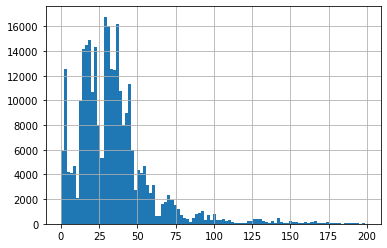

creating model...
start training...
Training until validation scores don't improve for 100 rounds
[25]	training's multi_logloss: 4.19466	valid_1's multi_logloss: 4.19436
[50]	training's multi_logloss: 4.14279	valid_1's multi_logloss: 4.16114
[75]	training's multi_logloss: 4.09844	valid_1's multi_logloss: 4.13175
[100]	training's multi_logloss: 4.05932	valid_1's multi_logloss: 4.10548
[125]	training's multi_logloss: 4.02362	valid_1's multi_logloss: 4.08111
[150]	training's multi_logloss: 3.9908	valid_1's multi_logloss: 4.05848
[175]	training's multi_logloss: 3.96042	valid_1's multi_logloss: 4.0374
[200]	training's multi_logloss: 3.93195	valid_1's multi_logloss: 4.01763
[225]	training's multi_logloss: 3.90532	valid_1's multi_logloss: 3.99906
[250]	training's multi_logloss: 3.88	valid_1's multi_logloss: 3.98131
[275]	training's multi_logloss: 3.85592	valid_1's multi_logloss: 3.96431
[300]	training's multi_logloss: 3.83303	valid_1's multi_logloss: 3.94819
[325]	training's multi_logloss: 3.

[2800]	training's multi_logloss: 3.07804	valid_1's multi_logloss: 3.45911
[2825]	training's multi_logloss: 3.07501	valid_1's multi_logloss: 3.45768
[2850]	training's multi_logloss: 3.07204	valid_1's multi_logloss: 3.45628
[2875]	training's multi_logloss: 3.06908	valid_1's multi_logloss: 3.4549
[2900]	training's multi_logloss: 3.06614	valid_1's multi_logloss: 3.45351
[2925]	training's multi_logloss: 3.06325	valid_1's multi_logloss: 3.45218
[2950]	training's multi_logloss: 3.06037	valid_1's multi_logloss: 3.45085
[2975]	training's multi_logloss: 3.05751	valid_1's multi_logloss: 3.44954
[3000]	training's multi_logloss: 3.05466	valid_1's multi_logloss: 3.44825
[3025]	training's multi_logloss: 3.05185	valid_1's multi_logloss: 3.44697
[3050]	training's multi_logloss: 3.04908	valid_1's multi_logloss: 3.44571
[3075]	training's multi_logloss: 3.04633	valid_1's multi_logloss: 3.4445
[3100]	training's multi_logloss: 3.0436	valid_1's multi_logloss: 3.4433
[3125]	training's multi_logloss: 3.0409	va

[5575]	training's multi_logloss: 2.84019	valid_1's multi_logloss: 3.37389
[5600]	training's multi_logloss: 2.83859	valid_1's multi_logloss: 3.37346
[5625]	training's multi_logloss: 2.83699	valid_1's multi_logloss: 3.37305
[5650]	training's multi_logloss: 2.83541	valid_1's multi_logloss: 3.37265
[5675]	training's multi_logloss: 2.83383	valid_1's multi_logloss: 3.37225
[5700]	training's multi_logloss: 2.83226	valid_1's multi_logloss: 3.37185
[5725]	training's multi_logloss: 2.83071	valid_1's multi_logloss: 3.37146
[5750]	training's multi_logloss: 2.82916	valid_1's multi_logloss: 3.37106
[5775]	training's multi_logloss: 2.8276	valid_1's multi_logloss: 3.37066
[5800]	training's multi_logloss: 2.82605	valid_1's multi_logloss: 3.37027
[5825]	training's multi_logloss: 2.82451	valid_1's multi_logloss: 3.36989
[5850]	training's multi_logloss: 2.82298	valid_1's multi_logloss: 3.36951
[5875]	training's multi_logloss: 2.82144	valid_1's multi_logloss: 3.36912
[5900]	training's multi_logloss: 2.8199

[8350]	training's multi_logloss: 2.69372	valid_1's multi_logloss: 3.34378
[8375]	training's multi_logloss: 2.69261	valid_1's multi_logloss: 3.3436
[8400]	training's multi_logloss: 2.6915	valid_1's multi_logloss: 3.34344
[8425]	training's multi_logloss: 2.6904	valid_1's multi_logloss: 3.34327
[8450]	training's multi_logloss: 2.68929	valid_1's multi_logloss: 3.34311
[8475]	training's multi_logloss: 2.68819	valid_1's multi_logloss: 3.34295
[8500]	training's multi_logloss: 2.6871	valid_1's multi_logloss: 3.34279
[8525]	training's multi_logloss: 2.686	valid_1's multi_logloss: 3.34262
[8550]	training's multi_logloss: 2.68491	valid_1's multi_logloss: 3.34244
[8575]	training's multi_logloss: 2.68382	valid_1's multi_logloss: 3.34228
[8600]	training's multi_logloss: 2.68274	valid_1's multi_logloss: 3.34211
[8625]	training's multi_logloss: 2.68166	valid_1's multi_logloss: 3.34195
[8650]	training's multi_logloss: 2.68058	valid_1's multi_logloss: 3.3418
[8675]	training's multi_logloss: 2.67951	vali

[11125]	training's multi_logloss: 2.5861	valid_1's multi_logloss: 3.33103
[11150]	training's multi_logloss: 2.58524	valid_1's multi_logloss: 3.33095
[11175]	training's multi_logloss: 2.5844	valid_1's multi_logloss: 3.33088
[11200]	training's multi_logloss: 2.58355	valid_1's multi_logloss: 3.33081
[11225]	training's multi_logloss: 2.5827	valid_1's multi_logloss: 3.33074
[11250]	training's multi_logloss: 2.58186	valid_1's multi_logloss: 3.33068
[11275]	training's multi_logloss: 2.58101	valid_1's multi_logloss: 3.33061
[11300]	training's multi_logloss: 2.58016	valid_1's multi_logloss: 3.33054
[11325]	training's multi_logloss: 2.57932	valid_1's multi_logloss: 3.33047
[11350]	training's multi_logloss: 2.57848	valid_1's multi_logloss: 3.33041
[11375]	training's multi_logloss: 2.57765	valid_1's multi_logloss: 3.33034
[11400]	training's multi_logloss: 2.57681	valid_1's multi_logloss: 3.33027
[11425]	training's multi_logloss: 2.57598	valid_1's multi_logloss: 3.33021
[11450]	training's multi_log

[13875]	training's multi_logloss: 2.50071	valid_1's multi_logloss: 3.32619
[13900]	training's multi_logloss: 2.50001	valid_1's multi_logloss: 3.32618
[13925]	training's multi_logloss: 2.49929	valid_1's multi_logloss: 3.32615
[13950]	training's multi_logloss: 2.49859	valid_1's multi_logloss: 3.32613
[13975]	training's multi_logloss: 2.49789	valid_1's multi_logloss: 3.32611
[14000]	training's multi_logloss: 2.49719	valid_1's multi_logloss: 3.32608
[14025]	training's multi_logloss: 2.49649	valid_1's multi_logloss: 3.32606
[14050]	training's multi_logloss: 2.49579	valid_1's multi_logloss: 3.32604
[14075]	training's multi_logloss: 2.49509	valid_1's multi_logloss: 3.32602
[14100]	training's multi_logloss: 2.4944	valid_1's multi_logloss: 3.326
[14125]	training's multi_logloss: 2.4937	valid_1's multi_logloss: 3.32598
[14150]	training's multi_logloss: 2.49301	valid_1's multi_logloss: 3.32597
[14175]	training's multi_logloss: 2.49231	valid_1's multi_logloss: 3.32595
[14200]	training's multi_logl

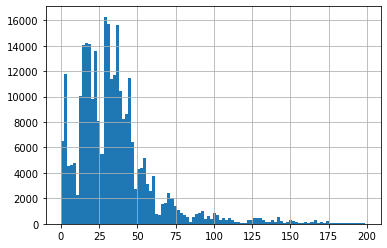

creating model...
start training...
Training until validation scores don't improve for 100 rounds
[25]	training's multi_logloss: 4.18139	valid_1's multi_logloss: 4.25114
[50]	training's multi_logloss: 4.12985	valid_1's multi_logloss: 4.21711
[75]	training's multi_logloss: 4.08598	valid_1's multi_logloss: 4.18691
[100]	training's multi_logloss: 4.04706	valid_1's multi_logloss: 4.15959
[125]	training's multi_logloss: 4.01191	valid_1's multi_logloss: 4.13459
[150]	training's multi_logloss: 3.97946	valid_1's multi_logloss: 4.11119
[175]	training's multi_logloss: 3.94926	valid_1's multi_logloss: 4.0893
[200]	training's multi_logloss: 3.92108	valid_1's multi_logloss: 4.06882
[225]	training's multi_logloss: 3.89456	valid_1's multi_logloss: 4.0495
[250]	training's multi_logloss: 3.86942	valid_1's multi_logloss: 4.03114
[275]	training's multi_logloss: 3.84561	valid_1's multi_logloss: 4.01377
[300]	training's multi_logloss: 3.82303	valid_1's multi_logloss: 3.99725
[325]	training's multi_logloss:

[2800]	training's multi_logloss: 3.07479	valid_1's multi_logloss: 3.50541
[2825]	training's multi_logloss: 3.07181	valid_1's multi_logloss: 3.50403
[2850]	training's multi_logloss: 3.06883	valid_1's multi_logloss: 3.50264
[2875]	training's multi_logloss: 3.06589	valid_1's multi_logloss: 3.50128
[2900]	training's multi_logloss: 3.06299	valid_1's multi_logloss: 3.49994
[2925]	training's multi_logloss: 3.06011	valid_1's multi_logloss: 3.49864
[2950]	training's multi_logloss: 3.05727	valid_1's multi_logloss: 3.49736
[2975]	training's multi_logloss: 3.05444	valid_1's multi_logloss: 3.49608
[3000]	training's multi_logloss: 3.05163	valid_1's multi_logloss: 3.49484
[3025]	training's multi_logloss: 3.04885	valid_1's multi_logloss: 3.49361
[3050]	training's multi_logloss: 3.04608	valid_1's multi_logloss: 3.49237
[3075]	training's multi_logloss: 3.04334	valid_1's multi_logloss: 3.49117
[3100]	training's multi_logloss: 3.04064	valid_1's multi_logloss: 3.48999
[3125]	training's multi_logloss: 3.037

[5575]	training's multi_logloss: 2.83835	valid_1's multi_logloss: 3.42331
[5600]	training's multi_logloss: 2.83677	valid_1's multi_logloss: 3.42294
[5625]	training's multi_logloss: 2.83519	valid_1's multi_logloss: 3.42255
[5650]	training's multi_logloss: 2.83362	valid_1's multi_logloss: 3.42218
[5675]	training's multi_logloss: 2.83207	valid_1's multi_logloss: 3.42183
[5700]	training's multi_logloss: 2.83052	valid_1's multi_logloss: 3.42148
[5725]	training's multi_logloss: 2.82896	valid_1's multi_logloss: 3.42112
[5750]	training's multi_logloss: 2.82743	valid_1's multi_logloss: 3.42077
[5775]	training's multi_logloss: 2.82589	valid_1's multi_logloss: 3.42043
[5800]	training's multi_logloss: 2.82437	valid_1's multi_logloss: 3.42009
[5825]	training's multi_logloss: 2.82286	valid_1's multi_logloss: 3.41975
[5850]	training's multi_logloss: 2.82134	valid_1's multi_logloss: 3.41943
[5875]	training's multi_logloss: 2.81982	valid_1's multi_logloss: 3.4191
[5900]	training's multi_logloss: 2.8183

[8375]	training's multi_logloss: 2.69219	valid_1's multi_logloss: 3.39759
[8400]	training's multi_logloss: 2.6911	valid_1's multi_logloss: 3.39746
[8425]	training's multi_logloss: 2.69001	valid_1's multi_logloss: 3.39732
[8450]	training's multi_logloss: 2.68892	valid_1's multi_logloss: 3.39719
[8475]	training's multi_logloss: 2.68783	valid_1's multi_logloss: 3.39707
[8500]	training's multi_logloss: 2.68675	valid_1's multi_logloss: 3.39695
[8525]	training's multi_logloss: 2.68567	valid_1's multi_logloss: 3.39683
[8550]	training's multi_logloss: 2.68461	valid_1's multi_logloss: 3.39672
[8575]	training's multi_logloss: 2.68354	valid_1's multi_logloss: 3.3966
[8600]	training's multi_logloss: 2.68247	valid_1's multi_logloss: 3.39649
[8625]	training's multi_logloss: 2.6814	valid_1's multi_logloss: 3.39637
[8650]	training's multi_logloss: 2.68033	valid_1's multi_logloss: 3.39626
[8675]	training's multi_logloss: 2.67926	valid_1's multi_logloss: 3.39613
[8700]	training's multi_logloss: 2.6782	v

[11150]	training's multi_logloss: 2.58547	valid_1's multi_logloss: 3.38941
[11175]	training's multi_logloss: 2.58462	valid_1's multi_logloss: 3.38938
[11200]	training's multi_logloss: 2.58377	valid_1's multi_logloss: 3.38934
[11225]	training's multi_logloss: 2.58292	valid_1's multi_logloss: 3.38931
[11250]	training's multi_logloss: 2.58208	valid_1's multi_logloss: 3.38928
[11275]	training's multi_logloss: 2.58123	valid_1's multi_logloss: 3.38925
[11300]	training's multi_logloss: 2.58039	valid_1's multi_logloss: 3.38923
[11325]	training's multi_logloss: 2.57956	valid_1's multi_logloss: 3.38921
[11350]	training's multi_logloss: 2.57872	valid_1's multi_logloss: 3.38917
[11375]	training's multi_logloss: 2.57789	valid_1's multi_logloss: 3.38915
[11400]	training's multi_logloss: 2.57705	valid_1's multi_logloss: 3.38913
[11425]	training's multi_logloss: 2.57622	valid_1's multi_logloss: 3.38911
[11450]	training's multi_logloss: 2.57538	valid_1's multi_logloss: 3.38909
[11475]	training's multi_

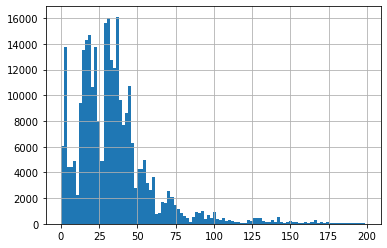

creating model...
start training...
Training until validation scores don't improve for 100 rounds
[25]	training's multi_logloss: 4.18365	valid_1's multi_logloss: 4.24181
[50]	training's multi_logloss: 4.13148	valid_1's multi_logloss: 4.20955
[75]	training's multi_logloss: 4.08734	valid_1's multi_logloss: 4.18115
[100]	training's multi_logloss: 4.04811	valid_1's multi_logloss: 4.15523
[125]	training's multi_logloss: 4.01231	valid_1's multi_logloss: 4.13116
[150]	training's multi_logloss: 3.97962	valid_1's multi_logloss: 4.10909
[175]	training's multi_logloss: 3.94921	valid_1's multi_logloss: 4.08843
[200]	training's multi_logloss: 3.92057	valid_1's multi_logloss: 4.06888
[225]	training's multi_logloss: 3.89373	valid_1's multi_logloss: 4.05042
[250]	training's multi_logloss: 3.86832	valid_1's multi_logloss: 4.03299
[275]	training's multi_logloss: 3.84425	valid_1's multi_logloss: 4.01645
[300]	training's multi_logloss: 3.82146	valid_1's multi_logloss: 4.00083
[325]	training's multi_loglos

[2800]	training's multi_logloss: 3.07064	valid_1's multi_logloss: 3.54498
[2825]	training's multi_logloss: 3.06766	valid_1's multi_logloss: 3.54376
[2850]	training's multi_logloss: 3.06471	valid_1's multi_logloss: 3.54253
[2875]	training's multi_logloss: 3.06179	valid_1's multi_logloss: 3.54132
[2900]	training's multi_logloss: 3.05888	valid_1's multi_logloss: 3.54012
[2925]	training's multi_logloss: 3.05598	valid_1's multi_logloss: 3.53894
[2950]	training's multi_logloss: 3.05311	valid_1's multi_logloss: 3.53777
[2975]	training's multi_logloss: 3.05028	valid_1's multi_logloss: 3.53663
[3000]	training's multi_logloss: 3.04745	valid_1's multi_logloss: 3.53551
[3025]	training's multi_logloss: 3.04465	valid_1's multi_logloss: 3.5344
[3050]	training's multi_logloss: 3.04188	valid_1's multi_logloss: 3.53331
[3075]	training's multi_logloss: 3.03913	valid_1's multi_logloss: 3.53224
[3100]	training's multi_logloss: 3.0364	valid_1's multi_logloss: 3.53117
[3125]	training's multi_logloss: 3.03368

[5600]	training's multi_logloss: 2.83179	valid_1's multi_logloss: 3.47119
[5625]	training's multi_logloss: 2.8302	valid_1's multi_logloss: 3.47085
[5650]	training's multi_logloss: 2.82862	valid_1's multi_logloss: 3.4705
[5675]	training's multi_logloss: 2.82706	valid_1's multi_logloss: 3.47015
[5700]	training's multi_logloss: 2.82549	valid_1's multi_logloss: 3.46983
[5725]	training's multi_logloss: 2.82392	valid_1's multi_logloss: 3.46949
[5750]	training's multi_logloss: 2.82237	valid_1's multi_logloss: 3.46917
[5775]	training's multi_logloss: 2.82082	valid_1's multi_logloss: 3.46885
[5800]	training's multi_logloss: 2.81928	valid_1's multi_logloss: 3.46854
[5825]	training's multi_logloss: 2.81775	valid_1's multi_logloss: 3.46822
[5850]	training's multi_logloss: 2.81622	valid_1's multi_logloss: 3.46791
[5875]	training's multi_logloss: 2.8147	valid_1's multi_logloss: 3.4676
[5900]	training's multi_logloss: 2.81319	valid_1's multi_logloss: 3.4673
[5925]	training's multi_logloss: 2.81169	va

[8400]	training's multi_logloss: 2.68499	valid_1's multi_logloss: 3.44743
[8425]	training's multi_logloss: 2.68389	valid_1's multi_logloss: 3.44731
[8450]	training's multi_logloss: 2.68279	valid_1's multi_logloss: 3.4472
[8475]	training's multi_logloss: 2.6817	valid_1's multi_logloss: 3.44708
[8500]	training's multi_logloss: 2.6806	valid_1's multi_logloss: 3.44696
[8525]	training's multi_logloss: 2.67951	valid_1's multi_logloss: 3.44684
[8550]	training's multi_logloss: 2.67843	valid_1's multi_logloss: 3.44672
[8575]	training's multi_logloss: 2.67735	valid_1's multi_logloss: 3.44659
[8600]	training's multi_logloss: 2.67627	valid_1's multi_logloss: 3.44647
[8625]	training's multi_logloss: 2.67519	valid_1's multi_logloss: 3.44638
[8650]	training's multi_logloss: 2.67412	valid_1's multi_logloss: 3.44627
[8675]	training's multi_logloss: 2.67305	valid_1's multi_logloss: 3.44616
[8700]	training's multi_logloss: 2.67199	valid_1's multi_logloss: 3.44606
[8725]	training's multi_logloss: 2.67093	

[11175]	training's multi_logloss: 2.57768	valid_1's multi_logloss: 3.44023
[11200]	training's multi_logloss: 2.57683	valid_1's multi_logloss: 3.44022
[11225]	training's multi_logloss: 2.57598	valid_1's multi_logloss: 3.4402
[11250]	training's multi_logloss: 2.57512	valid_1's multi_logloss: 3.44018
[11275]	training's multi_logloss: 2.57426	valid_1's multi_logloss: 3.44015
[11300]	training's multi_logloss: 2.57342	valid_1's multi_logloss: 3.44013
[11325]	training's multi_logloss: 2.57257	valid_1's multi_logloss: 3.4401
[11350]	training's multi_logloss: 2.57172	valid_1's multi_logloss: 3.44007
[11375]	training's multi_logloss: 2.57088	valid_1's multi_logloss: 3.44004
[11400]	training's multi_logloss: 2.57004	valid_1's multi_logloss: 3.44001
[11425]	training's multi_logloss: 2.56919	valid_1's multi_logloss: 3.43999
[11450]	training's multi_logloss: 2.56835	valid_1's multi_logloss: 3.43997
[11475]	training's multi_logloss: 2.56752	valid_1's multi_logloss: 3.43995
[11500]	training's multi_lo

<Figure size 432x288 with 0 Axes>

In [22]:
count = 0
oof = np.zeros((training_data_df.shape[0],200))

for train_idx, val_idx in gkf.split(training_data_df, groups=training_data_df['지번주소']):
    print('Fold {} start'.format(count))
    
    print('creating fold data...')
    train_data = training_data_df.loc[train_idx].sample(frac=1).reset_index(drop=True)
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=cols_to_drop)
    y_train = train_data['가격_면적_classes']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=cols_to_drop)
    y_val = val_data['가격_면적_classes']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    print('creating model...')
    params = {
        'objective': 'multiclass',
        'num_class':200,
        #'alpha': 1.35,
        'learning_rate': 0.001,
        'seed': 42,
        'max_depth': 6,
        'num_leaves': 29,
        'min_data_in_leaf': 128,
        #'bagging_fraction':0.7,
        'feature_fraction':0.7,
        #'lambda_l2': 0,
        'metric': 'multi_logloss',
        'num_threads': 6,
        'verbosity': -1
        #'is_unbalance': True
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    num_rounds = 50000
     
    print('start training...')
    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[train_dataset, val_dataset],
                    early_stopping_rounds=100, verbose_eval=25, keep_training_booster=True
                   )    
    
    '''model = lgb.LGBMClassifier(
        objective='multiclass', learning_rate=0.003, n_estimators=50000, colsample_bytree=0.7, n_jobs=6,
        min_child_samples=256
    )'''
    '''model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_val, y_val)], early_stopping_rounds=100, verbose=25,
              categorical_feature=cat_cols)'''
    
    print('saving model...')
    bst.save_model(basedir + 'lightgbm_multiclass_lower_lr_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    #pickle.dump(model, open(basedir + 'lightgbm_multiclass_{}.joblib'.format(count), 'wb'))
    
    #preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    '''print('making preliminary predictions...')
    preds_proba = model.predict_proba(x_val)'''
    
    '''print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()'''
    
    '''print('preds dist plot')
    sns.displot(np.argmax(preds_proba, axis=1))
    plt.show()
    plt.clf()'''
    
    #oof[val_idx] = preds    
    #oof[val_idx,:] = preds_proba
    
    #print(np.sqrt(mean_squared_error(y_val, preds)))
    #print(log_loss(y_val, preds_proba, labels=[i for i in range(200)]))
    
    print('Fold {} end'.format(count))
    count += 1
    